In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Import Datasets
df_seq = pd.read_csv('/content/gdrive/My Drive/Bioinformatics/pdb_data_seq.csv')
df_char = pd.read_csv('/content/gdrive/My Drive/Bioinformatics/pdb_data_no_dups.csv')

In [ ]:
# 2). ----- Filter and Process Dataset ------

# Filter for only proteins
protein_char = df_char[df_char.macromoleculeType == 'Protein']
protein_seq = df_seq[df_seq.macromoleculeType == 'Protein']

# Select only necessary variables to join
protein_char = protein_char[['structureId','classification']]
protein_seq = protein_seq[['structureId','sequence']]
protein_seq.head()

,structureId,sequence
4,101M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
7,102L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
8,102M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
11,103L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
12,103M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [ ]:
protein_char.head()

,structureId,classification
2,101M,OXYGEN TRANSPORT
4,102L,HYDROLASE(O-GLYCOSYL)
5,102M,OXYGEN TRANSPORT
7,103L,HYDROLASE(O-GLYCOSYL)
8,103M,OXYGEN TRANSPORT


In [ ]:
model_f = protein_char.set_index('structureId').join(protein_seq.set_index('structureId'))
model_f.head()

,classification,sequence
structureId,,
101M,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
102L,HYDROLASE(O-GLYCOSYL),MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
102M,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
103L,HYDROLASE(O-GLYCOSYL),MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
103M,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [ ]:
# Check NA counts
model_f.isnull().sum()

classification      1
sequence          469
dtype: int64

In [ ]:
# Drop rows with missing values
model_f = model_f.dropna()
print('%d is the number of proteins that have a classification and sequence' %model_f.shape[0])

345197 is the number of proteins that have a classification and sequence


HYDROLASE                              46193
TRANSFERASE                            36264
OXIDOREDUCTASE                         34223
IMMUNE SYSTEM                          15586
LYASE                                  11644
                                       ...  
Actin-BINDING PROTEIN                      1
YJQ8WW DOMAIN                              1
ATP binding Protein                        1
STRUCTURAL PROTEIN, DE NOVO PROTEIN        1
TRANSLATION, RIBOSOME                      1
Name: classification, Length: 4458, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


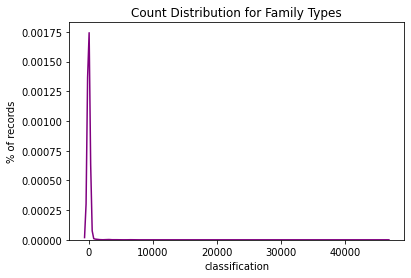

In [ ]:
# Look at classification type counts
counts = model_f.classification.value_counts()
print(counts)

#plot counts
plt.figure()
sns.distplot(counts, hist = False, color = 'purple')
plt.title('Count Distribution for Family Types')
plt.ylabel('% of records')
plt.show()

In [ ]:
print(counts['HYDROLASE'])
print(counts['LIGASE'])
print(counts['TRANSFERASE'])
print(counts['OXIDOREDUCTASE'])
print(counts['ISOMERASE'])
print(counts['LYASE'])

46193
4926
36264
34223
6345
11644


In [ ]:
max_length=model_f["sequence"].str.len().max()

In [ ]:
# Get classification types where counts are over 1000
#types = np.asarray(counts[(counts > 1000)].index)
types=['HYDROLASE'
,'LIGASE'
,'TRANSFERASE'
,'OXIDOREDUCTASE'
,'ISOMERASE'
,'LYASE']

# Filter dataset's records for classification types > 1000
data = model_f[model_f.classification.isin(types)]

#data_m = data[(data['classification'] =='HYDROLASE' )  (data['classification'] =='LIGASE' ) or (data['classification'] =='TRANSFERASE' ) or (data['classification'] =='OXIDOREDUCTASE' ) or (data['classification'] =='ISOMERASE' ) or (data['classification'] =='LYASE' )]

print(types)
print('%d is the number of records in the final filtered dataset' %data.shape[0])

['HYDROLASE', 'LIGASE', 'TRANSFERASE', 'OXIDOREDUCTASE', 'ISOMERASE', 'LYASE']
139595 is the number of records in the final filtered dataset


In [ ]:
train=data
a=train.classification.unique()
l=len(train.classification.unique())
print(a)

['HYDROLASE' 'LIGASE' 'TRANSFERASE' 'OXIDOREDUCTASE' 'ISOMERASE' 'LYASE']


In [ ]:
for i in range (l):
    train.classification = train.classification.replace(a[i], i)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
train.classification.head()

structureId
117E    0
117E    0
11AS    1
11AS    1
11BA    0
Name: classification, dtype: int64

In [ ]:
train.classification.value_counts()

0    46193
2    36264
3    34223
5    11644
4     6345
1     4926
Name: classification, dtype: int64

In [ ]:
df=train
df.head()

,classification,sequence
structureId,,
117E,0,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
117E,0,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
11AS,1,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...
11AS,1,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...
11BA,0,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...


In [ ]:
X=df['sequence']
Y=df['classification']

In [ ]:
# 3). ----- Train Test Split -----

# Split Data
X_train, X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.10, random_state = 1)

# Create a Count Vectorizer to gather the unique elements in sequence
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4))

# Fit and Transform CountVectorizer
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

#Print a few of the features
print(vect.get_feature_names()[-20:])

['zhhh', 'ziar', 'zigi', 'ziwz', 'zkal', 'zkky', 'zknt', 'zkyh', 'zlik', 'zlzk', 'zpvm', 'zrgd', 'zrvi', 'ztvl', 'ztzk', 'zvbd', 'zvib', 'zvka', 'zwdl', 'zzvb']


In [ ]:
# 4). ------ Machine Learning Models ------

# Make a prediction dictionary to store accuracys
prediction = dict()

# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)
predicted_classes = model.predict(X_test_df)
prediction["MultinomialNB"] = accuracy_score(predicted_classes, y_test)
print( prediction['MultinomialNB'])

0.9208452722063037


In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(6)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.92      0.94      0.93      4689
     Class 1       0.90      0.85      0.87       513
     Class 2       0.88      0.94      0.91      3570
     Class 3       0.97      0.90      0.93      3453
     Class 4       0.93      0.90      0.92       608
     Class 5       0.94      0.89      0.92      1127

    accuracy                           0.92     13960
   macro avg       0.92      0.90      0.91     13960
weighted avg       0.92      0.92      0.92     13960



In [ ]:
name=[]
for i in range(6):
  name.append(i)


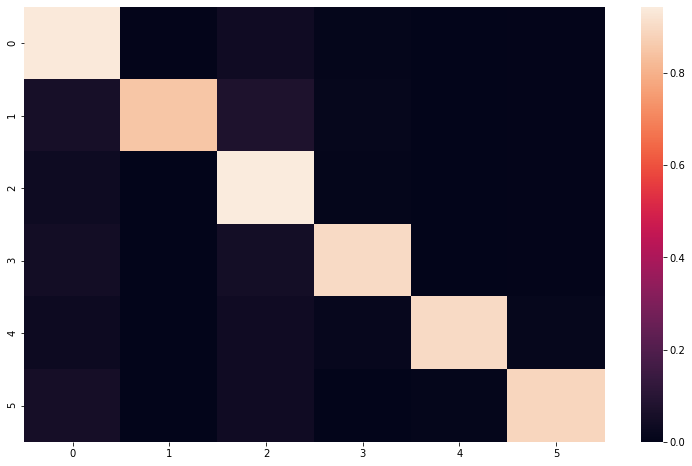

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, predicted_classes, labels = name)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[4392   28  185   50   16   18]
 [  30  436   39    6    0    2]
 [ 130   13 3366   31   12   18]
 [ 156    3  168 3110    2   14]
 [  20    0   23    9  548    8]
 [  62    4   44    4   10 1003]]
Normalized confusion matrix
[[9.37e-01 5.97e-03 3.95e-02 1.07e-02 3.41e-03 3.84e-03]
 [5.85e-02 8.50e-01 7.60e-02 1.17e-02 0.00e+00 3.90e-03]
 [3.64e-02 3.64e-03 9.43e-01 8.68e-03 3.36e-03 5.04e-03]
 [4.52e-02 8.69e-04 4.87e-02 9.01e-01 5.79e-04 4.05e-03]
 [3.29e-02 0.00e+00 3.78e-02 1.48e-02 9.01e-01 1.32e-02]
 [5.50e-02 3.55e-03 3.90e-02 3.55e-03 8.87e-03 8.90e-01]]


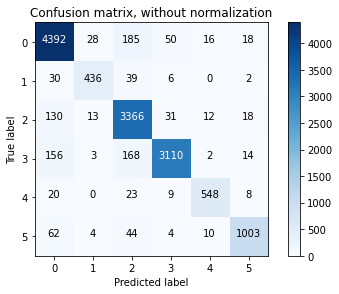

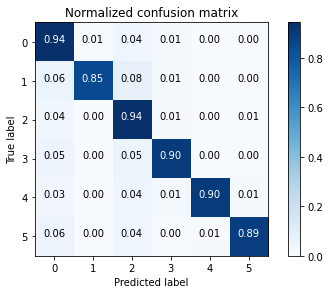

In [ ]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


class_names = name

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()